In [1]:
# import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [2]:
# parameters
samplesizes = np.arange(50,1001,step=50)
stdevs = np.linspace(.1,7,41)

# initialization
CIs = np.zeros((len(samplesizes),len(stdevs)))

# experiment
for ni,N in enumerate(samplesizes):
  for si,s in enumerate(stdevs):

    # SEM
    sem = s/np.sqrt(N)

    # CI
    CIs[ni,si] = 2*stats.t.interval(.95,N-1,loc=0,scale=sem)[1]

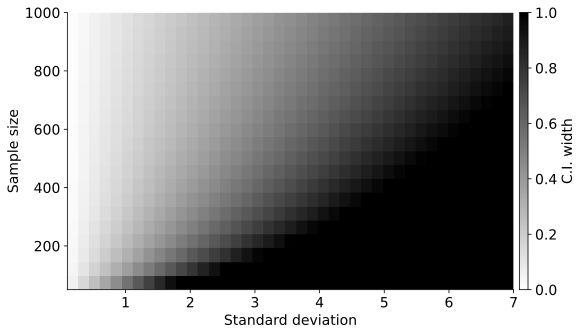

In [3]:
# plot 
fig,ax = plt.subplots(1,figsize=(8,5))
cax = ax.imshow(CIs,origin='lower',aspect='auto',vmin=0,vmax=1,cmap='gray_r',
          extent=[stdevs[0],stdevs[-1],samplesizes[0],samplesizes[-1]])
ax.set(xlabel='Standard deviation',ylabel='Sample size')

# colorbar
cbar_ax = fig.add_axes([.91,.11,.015,.77])
cbar = plt.colorbar(cax,cax=cbar_ax,label='C.I. width')

# display the figure
plt.show()

# Exe 2

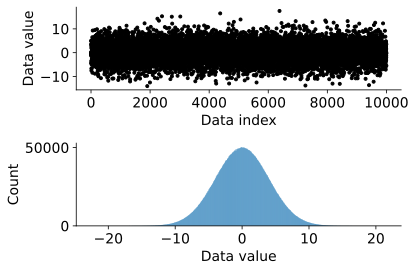

In [4]:
# simulate data

popN = int(1e7) 

# the data
population = (4*np.random.randn(popN))**1 

# we can calculate the exact population mean
popMean = np.mean(population)

# plot
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plotting only every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')

# display the figure
plt.tight_layout()
plt.show()

In [5]:
# draw a random sample

# parameters
samplesize = 500
confidence =  95 # in percent

# compute sample mean
dataSample = np.random.choice(population,samplesize)
samplemean = np.mean(dataSample)
samplestd  = np.std(dataSample,ddof=1)

# compute confidence intervals
confint = stats.t.interval(confidence/100,samplesize-1,
                           loc=samplemean,scale=samplestd/np.sqrt(samplesize))

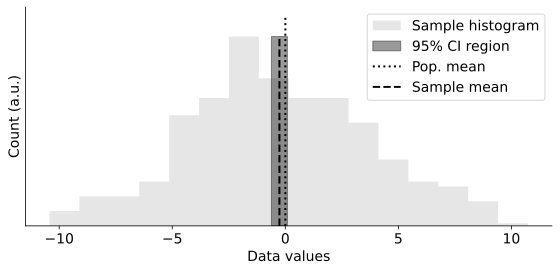

In [6]:
# plot
fig,ax = plt.subplots(1,figsize=(8,4))

# the histogram
h = ax.hist(dataSample,bins='fd',color='k',alpha=.1,label='Sample histogram')
ytop = np.max(h[0]) # variable for histogram peak value

# confidence interval area
ax.fill_between([confint[0],confint[1]],[0,0],[ytop,ytop],color='k',alpha=.4,label=f'{confidence}% CI region')

# add the linesindicating population means
ax.plot([popMean,popMean],[0,ytop*1.1],'k:',linewidth=2,label='Pop. mean')
ax.plot([samplemean,samplemean],[0,ytop],'k--',linewidth=2,label='Sample mean')

# adjust the plot
ax.legend()
ax.set(yticks=[],xlabel='Data values',ylabel='Count (a.u.)')

# display the figure
plt.tight_layout()
plt.show()